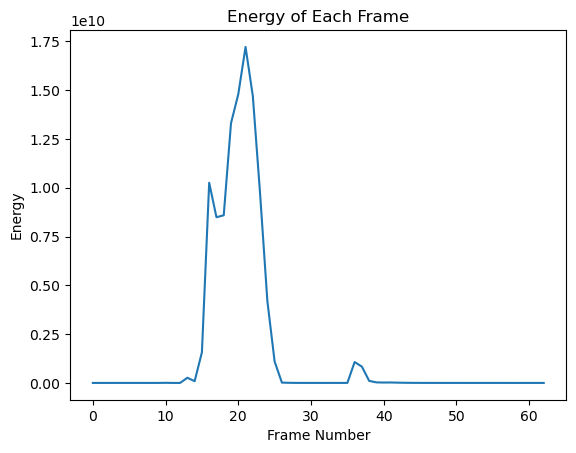

In [8]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write

def calEnergy(wave_data):
    energy = []
    sum_energy = 0

    for i in range(len(wave_data)):
        sum_energy += int(wave_data[i]) ** 2

        if (i + 1) % 256 == 0: 
            energy.append(sum_energy)
            sum_energy = 0 
        elif i == len(wave_data) - 1:  
            energy.append(sum_energy)

    return energy


if __name__ == "__main__":
  
    sample_rate, wave_data = read('cat.wav') 
   
    if wave_data.ndim > 1:
        wave_data = wave_data[:, 0]  

    energy = calEnergy(wave_data)

    plt.plot(energy)
    plt.title('Energy of Each Frame')
    plt.xlabel('Frame Number')
    plt.ylabel('Energy')
    plt.show()


Read the wav File and Parameters

Number of sample points: 32000


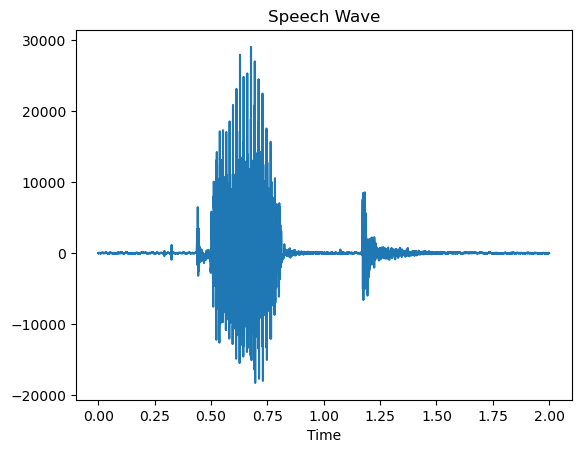

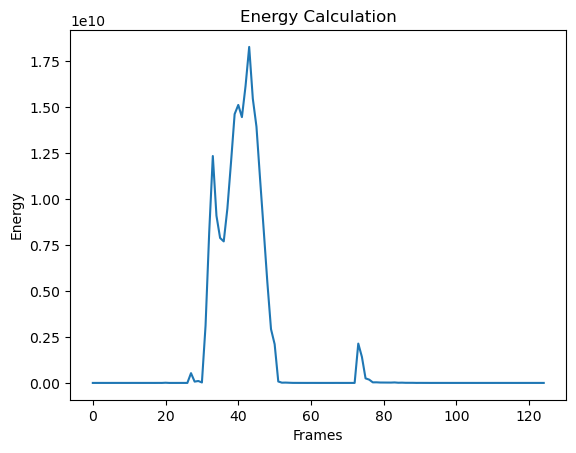

In [7]:
import wave
import numpy as np
import matplotlib.pyplot as plt

f = wave.open("cat.wav", "rb")
params = f.getparams()
nchannels, sampwidth, framerate, nframes = params[:4]
Str_data = f.readframes(nframes)  # Str_data is a binary string
Str_data = np.frombuffer(Str_data, dtype="int16")
f_rate = f.getframerate()

wave_data = np.frombuffer(Str_data, dtype=np.short)
print("Number of sample points: " + str(len(wave_data)))

time = np.linspace(0, len(Str_data) / f_rate, num=len(Str_data))

plt.figure(1)
plt.title("Speech Wave")
plt.xlabel("Time")
plt.plot(time, Str_data)
plt.show()

energy = calEnergy(wave_data)

plt.figure()
plt.plot(energy)
plt.axis('tight')
plt.xlabel('Frames')
plt.ylabel('Energy')
plt.title('Energy Calculation')
plt.show()


Pitch Calculation

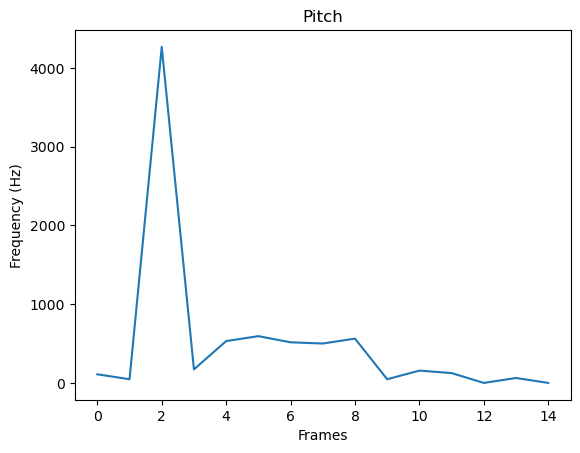

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy.fft import rfft, rfftfreq

FRAME_SIZE = 1024

def ProcessFrame(frame, Fs):
    fft_spectrum = rfft(frame)
    frequencies = rfftfreq(len(frame), d=1/Fs)
    peak_index = np.argmax(np.abs(fft_spectrum))
    return frequencies[peak_index]

Fs, data = read('cat.wav')

if len(data.shape) > 1:
    data = data[:, 0]

numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)

for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ProcessFrame(frame.astype(float), Fs)

plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frames')
plt.ylabel('Frequency (Hz)')
plt.title('Pitch')
plt.show()


 Zero crossing

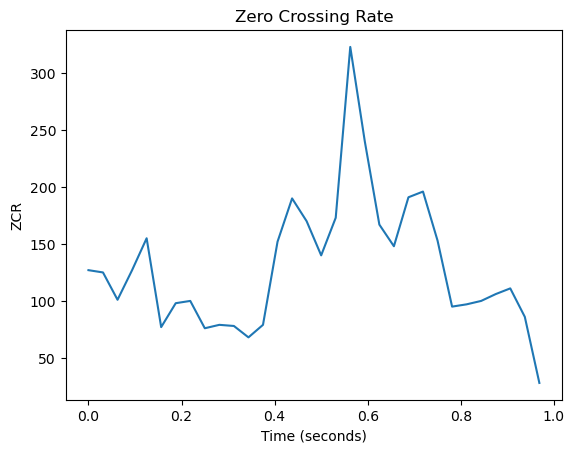

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

def ZeroCR(waveData, frameSize, overlap):
    wlen = len(waveData)
    step = frameSize - overlap
    frameNum = math.ceil(wlen / step)
    zcr = np.zeros(frameNum)
    
    for i in range(frameNum):
        curFrame = waveData[np.arange(i * step, min(i * step + frameSize, wlen))]
        curFrame = curFrame - np.mean(curFrame) 
        zcr[i] = np.sum(curFrame[0:-1] * curFrame[1:] <= 0)
    
    return zcr

overlap = 512
wave_data.shape = -1, 1  
zcr = ZeroCR(wave_data, FRAME_SIZE, overlap)

time2 = np.arange(0, len(zcr)) * (len(wave_data) / len(zcr) / f_rate)

plt.plot(time2, zcr)
plt.ylabel('ZCR')
plt.xlabel('Time (seconds)')
plt.title('Zero Crossing Rate')
plt.show()
